In [392]:
from scipy.stats import uniform, truncnorm, beta
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as style

In [393]:
lower, upper = 0, 1
mu, sigma = 0.8, 0.15

theta = stats.truncnorm((lower - mu) / sigma, 
                         (upper - mu) / sigma, 
                         loc=mu, 
                         scale=sigma)
rTheta = uniform(0,1)


seq = np.linspace(0,1,1000)
val1 = [theta.expect() if y >= theta.expect()
        else theta.expect(conditional=True,lb=0,ub=y)  if y <= theta.ppf(z)
        else 0 
        for x,y,z in zip(theta.cdf(seq),
                        rTheta.ppf(seq),
                        seq)]

mu, sigma = 0.5, 0.15
rTheta = stats.truncnorm((lower - mu) / sigma, 
                         (upper - mu) / sigma, 
                         loc=mu, 
                         scale=sigma)

val2 = [theta.expect() if y >= theta.expect()
        else theta.expect(conditional=True,lb=0,ub=y) if y <= theta.ppf(z)
        else 0 
        for x,y,z in zip(theta.cdf(seq),
                        rTheta.ppf(seq),
                        seq)]
rTheta=beta(2,2)
val3 = [theta.expect() if y >= theta.expect()
        else theta.expect(conditional=True,lb=0,ub=y) if y <= theta.ppf(z)
        else 0 
        for x,y,z in zip(theta.cdf(seq),
                        rTheta.ppf(seq),
                        seq)]



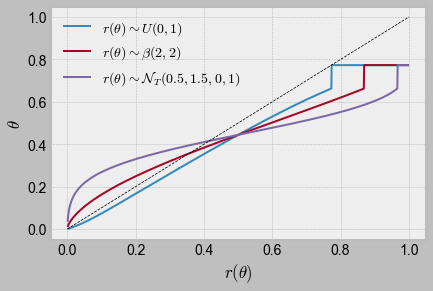

In [409]:
style.use('bmh')
l3 = plt.plot(seq,val1,label=r'$r(\theta)\sim U(0,1)$')
l1 = plt.plot(seq,val3,label=r'$r(\theta)\sim\beta(2,2)$')
l2 = plt.plot(seq,val2,label=r'$r(\theta)\sim\mathcal{N}_T(0.5,1.5,0,1)$')
l4 = plt.plot(seq, uniform(0,1).cdf(seq),'black',linestyle='--',linewidth=0.75)
plt.xlabel(r"$r(\theta)$")
plt.ylabel(r"$\theta$")
plt.legend()
plt.show()

